## 栈的数据结构
一、栈的基础知识

1. 定义

栈（Stack）是一种线性数据结构，特点是：

后进先出（LIFO, Last In First Out）

最后进入的数据最先被取出。

可以理解为：

像一摞盘子，只能从顶部放入或取出。



2. 栈的核心操作

只允许在“栈顶”操作。

基本操作包括：

* push(x) ：入栈
* pop() ：出栈
* peek()/top() ：查看栈顶元素
* isEmpty() ：判断是否为空

时间复杂度：

这些操作通常都是 O(1)。



3. 栈适用场景（本质）

凡是具有“嵌套”“配对”“逆序”特征的问题，都可能使用栈，例如：

* 括号匹配
* 表达式求值
* 函数调用栈
* 单调栈问题
* DFS（递归本质就是栈）



二、Python 中如何构建栈

Python 没有专门的 Stack 类型，通常使用：

list 作为栈

因为：

* append() 是尾部插入 → O(1)
* pop() 默认弹出尾部 → O(1)

尾部天然就是“栈顶”。



三、Python 中栈的常见语法

1. 创建栈

```python
stack = []
```

2. 入栈（push）

```python
stack.append(x)
```

3. 出栈（pop）

```python
x = stack.pop()
```

注意：

* 如果栈为空调用 pop() 会报错

安全写法：

```python
if stack:
    stack.pop()
```

4. 查看栈顶元素（peek）

```python
top = stack[-1]
```

5. 判断是否为空

```python
if not stack:
    ...
```



四、简单示例

```python
stack = []

stack.append(1)
stack.append(2)
stack.append(3)

print(stack)        # [1, 2, 3]

print(stack.pop())  # 3
print(stack)        # [1, 2]
```


五、为什么不用 queue 或 deque？

1. list 足够快（尾部操作 O(1)）
2. 不要用 pop(0)，那是 O(n)

如果需要“队列”功能，应使用：

```
from collections import deque
```

但栈一般直接用 list。



六、栈的复杂度总结

| 操作   | 时间复杂度 |
| ---- | ----- |
| push | O(1)  |
| pop  | O(1)  |
| peek | O(1)  |

空间复杂度：

O(n)（存储元素）



七、本质理解

栈不是特殊结构，它的核心约束是：

“只允许在一端操作”

在 Python 中：

list 的尾部就是栈顶。



一句总结：

栈 = 受限访问的线性表
Python 中用 list + append() + pop() 实现即可。


## 20. 有效的括号

给定一个只包括 '('，')'，'{'，'}'，'['，']' 的字符串 s ，判断字符串是否有效。

有效字符串需满足：

左括号必须用相同类型的右括号闭合。
左括号必须以正确的顺序闭合。
每个右括号都有一个对应的相同类型的左括号。

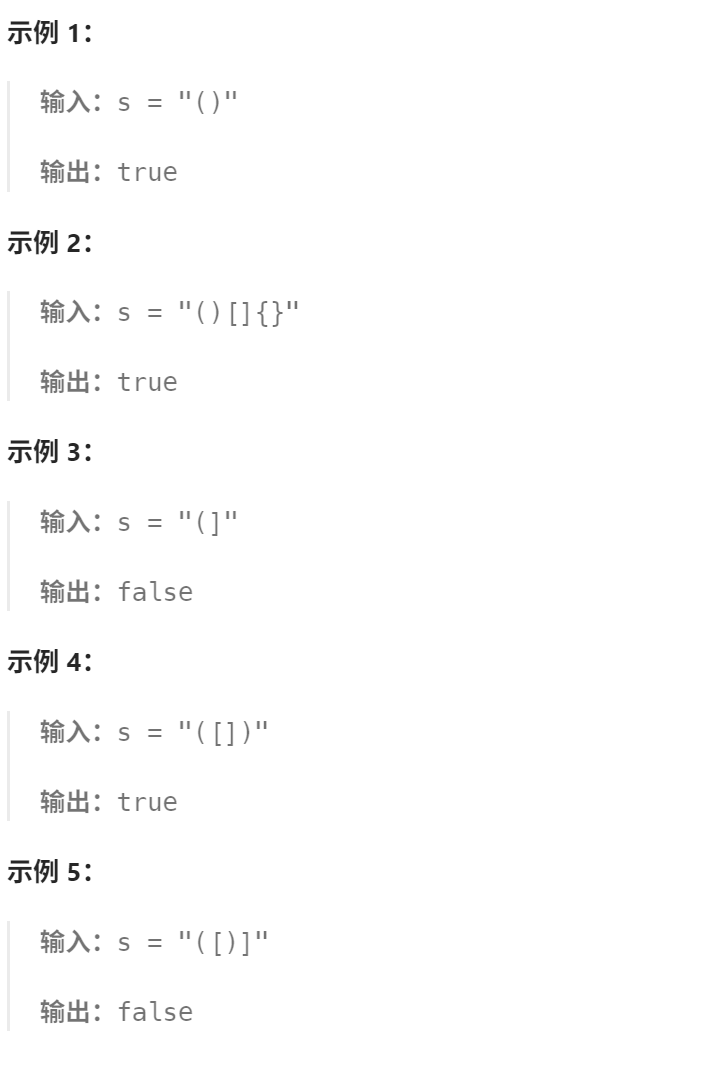

核心思路:

这是典型的“栈匹配”问题。

算法流程：

创建一个栈

遍历字符串：

如果是左括号 → 入栈

如果是右括号：

若栈为空 → 直接 False

若栈顶不匹配 → False

匹配则弹出栈顶

遍历结束后：

若栈为空 → True

否则 → False

本质：保证“后进先出”的嵌套结构。


In [1]:
class Solution:
    def isValid(self, s: str) -> bool:
        """
        判断括号字符串是否有效
        """
        
        stack = []
        
        # 右括号到左括号的映射
        mapping = {
            ')': '(',
            ']': '[',
            '}': '{'
        }
        
        for ch in s:
            
            # 如果是左括号，直接入栈
            if ch in '([{':
                stack.append(ch)
            
            # 如果是右括号
            else:
                # 栈为空，说明没有可匹配的左括号
                if not stack:
                    return False
                
                # 判断是否匹配
                if stack[-1] != mapping[ch]:
                    return False
                
                # 匹配成功，弹出栈顶
                stack.pop()
        
        # 最终栈必须为空才是有效字符串
        return not stack

s = "(()[]{})"
print(Solution().isValid(s))

True


时间复杂度：
O(n)

每个字符最多入栈一次、出栈一次。

空间复杂度：
O(n)

最坏情况下（例如 "((((("），所有字符都会入栈。

## 155. 最小栈

设计一个支持 push ，pop ，top 操作，并能在常数时间内检索到最小元素的栈。

实现 MinStack 类:

MinStack() 初始化堆栈对象。

void push(int val) 将元素val推入堆栈。

void pop() 删除堆栈顶部的元素。

int top() 获取堆栈顶部的元素。

int getMin() 获取堆栈中的最小元素

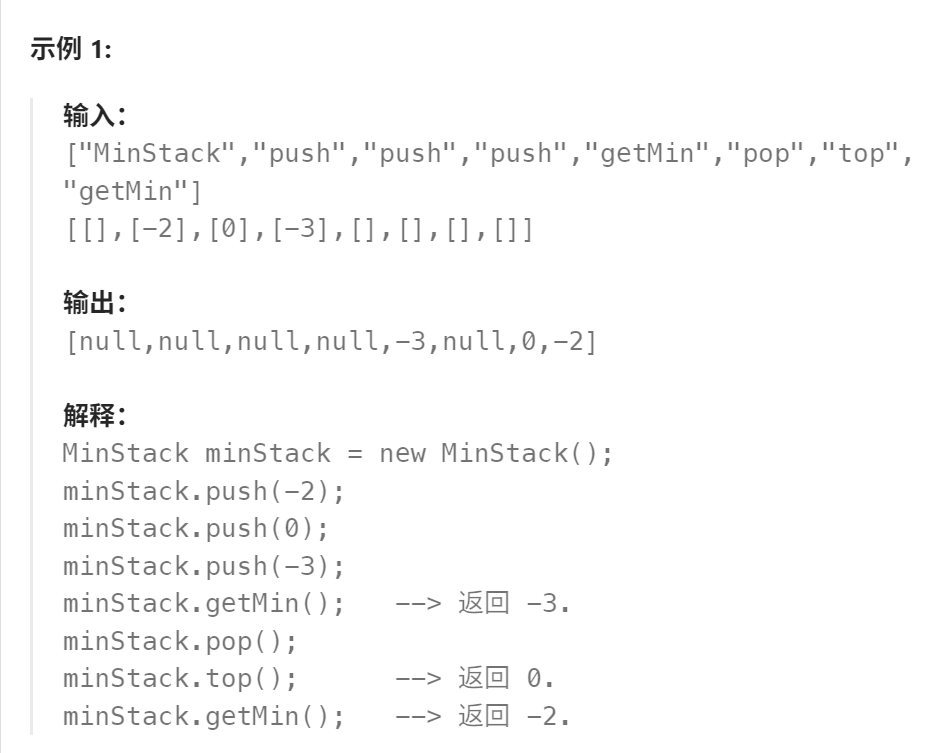

核心思路：

普通栈只能在 O(1) 时间完成 push / pop / top，但无法在 O(1) 时间得到最小值。若每次调用 getMin() 都遍历一遍栈，时间复杂度为 O(n)，不符合要求。

解决关键在于：在入栈时就维护“当前最小值”。
常见且最优解法是使用 两个栈：

1）数据栈：正常存储元素
2）辅助栈（最小栈）：存储“当前阶段的最小值”

规则：

push(val)

数据栈正常入栈

若最小栈为空或 val <= 当前最小值，则将 val 入最小栈

pop()

若弹出的元素等于最小栈栈顶，也同时弹出最小栈

getMin()

直接返回最小栈栈顶

这样所有操作都是 O(1)。

In [2]:
class MinStack:

    def __init__(self):
        # 主栈：存储所有元素
        self.stack = []
        # 辅助栈：存储当前最小值
        self.min_stack = []

    def push(self, val: int) -> None:
        # 正常入栈
        self.stack.append(val)
        
        # 如果最小栈为空，或者当前值小于等于当前最小值
        if not self.min_stack or val <= self.min_stack[-1]:
            self.min_stack.append(val)

    def pop(self) -> None:
        # 弹出主栈顶部元素
        val = self.stack.pop()
        
        # 如果弹出的值等于当前最小值
        if val == self.min_stack[-1]:
            self.min_stack.pop()

    def top(self) -> int:
        # 返回主栈顶部元素
        return self.stack[-1]

    def getMin(self) -> int:
        # 返回当前最小值
        return self.min_stack[-1]

min_stack = MinStack()
min_stack.push(-2)
min_stack.push(0)
min_stack.push(-3)
print(min_stack.getMin())  # 返回 -3
min_stack.pop()
print(min_stack.top())     # 返回 0
print(min_stack.getMin())  # 返回 -2

-3
0
-2


复杂度分析

时间复杂度：

push：O(1)

pop：O(1)

top：O(1)

getMin：O(1)

所有操作均为常数时间。

空间复杂度：

最坏情况下（单调递减序列），辅助栈会存储所有元素

空间复杂度为 O(n)



**进一步优化思路（理解层面）**

也可以只用一个栈，每个元素存为 (val, 当前最小值)，例如：

push(3) → (3,3)
push(5) → (5,3)
push(2) → (2,2)

这样每个位置都保存了当时的最小值，也能 O(1) 取最小值。
本质思想相同：在入栈时就维护历史最小信息。

In [3]:
class MinStack:

    def __init__(self):
        """
        初始化栈。
        栈中每个元素存为 (当前值, 当前栈内最小值)
        """
        self.stack = []

    def push(self, val: int) -> None:
        """
        入栈操作：
        如果栈为空，则当前最小值就是 val。
        如果不为空，则当前最小值 = min(val, 栈顶记录的最小值)。
        """
        if not self.stack:
            # 第一个元素，最小值就是它本身
            self.stack.append((val, val))
        else:
            # 当前最小值等于 新值 和 之前最小值 的较小者
            current_min = min(val, self.stack[-1][1])
            self.stack.append((val, current_min))

    def pop(self) -> None:
        """
        弹出栈顶元素。
        不需要额外维护最小值，因为每个元素已经保存好了。
        """
        self.stack.pop()

    def top(self) -> int:
        """
        返回栈顶元素的值。
        """
        return self.stack[-1][0]

    def getMin(self) -> int:
        """
        返回当前栈内的最小值。
        直接读取栈顶元素保存的最小值。
        """
        return self.stack[-1][1]
    
min_stack = MinStack()
min_stack.push(-2)
min_stack.push(0)
min_stack.push(-3)
print(min_stack.getMin())  # 返回 -3
min_stack.pop()
print(min_stack.top())     # 返回 0
print(min_stack.getMin())  # 返回 -2

-3
0
-2


## 394. 字符串解码

给定一个经过编码的字符串，返回它解码后的字符串。

编码规则为: k[encoded_string]，表示其中方括号内部的 encoded_string 正好重复 k 次。注意 k 保证为正整数。

你可以认为输入字符串总是有效的；输入字符串中没有额外的空格，且输入的方括号总是符合格式要求的。

此外，你可以认为原始数据不包含数字，所有的数字只表示重复的次数 k ，例如不会出现像 3a 或 2[4] 的输入。

测试用例保证输出的长度不会超过 105。

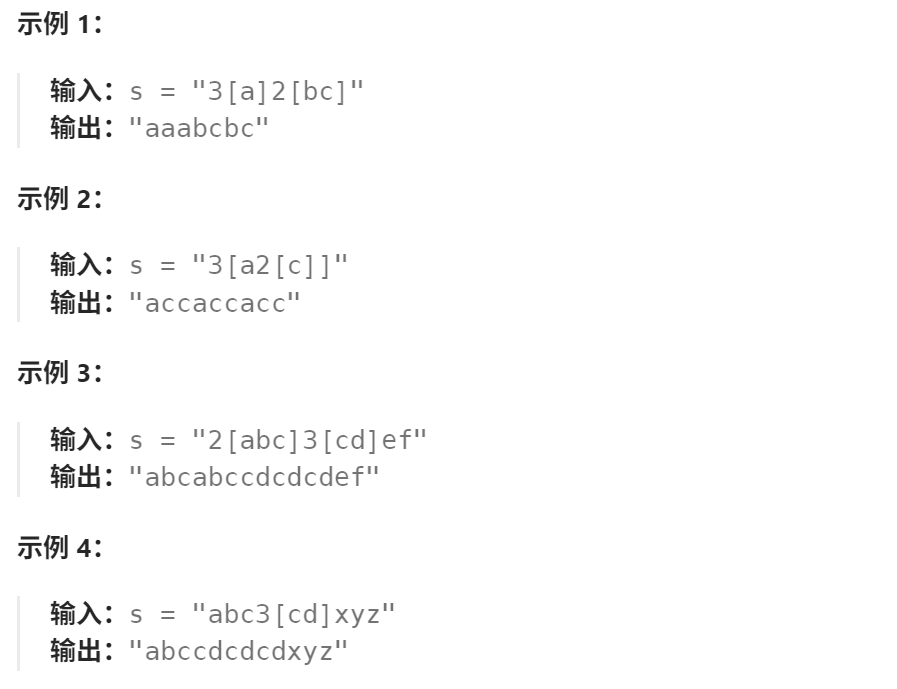

核心思路

本题本质是“嵌套结构解析”。
关键特征是：

数字 k 只会出现在 '[' 前

可能存在多层嵌套，如 3[a2[c]]

最稳健的方式是使用栈来保存“进入括号前的状态”。

当遇到 '[' 时：

把当前构造的字符串

把当前解析出的数字
压入栈
然后开始构造新的子串

当遇到 ']' 时：

当前字符串已经构造完成

弹出栈顶的 (previous_string, repeat_count)

组合为：previous_string + repeat_count * 当前字符串

这本质是一个“递归展开过程”的迭代写法。

牢记：

进入新的一层时，需要做什么？
→ 保存当前层状态
→ 开始一个全新的子层

退出当前层时，需要做什么？
→ 用当前层结果去更新上一层

这就是全部逻辑。

In [4]:
class Solution:
    def decodeString(self, s: str) -> str:
        stack = []              # 用于保存 (之前字符串, 重复次数)
        current_num = 0         # 当前正在解析的数字
        current_str = ""        # 当前正在构造的字符串

        for ch in s:
            
            if ch.isdigit():
                # 为了防止是多位数，例如 12[a]
                current_num = current_num * 10 + int(ch)
            
            elif ch == '[':
                # 遇到左括号，说明一个新层级开始
                # 把当前状态压栈
                stack.append((current_str, current_num))
                
                # 重置当前状态
                current_str = ""
                current_num = 0
            
            elif ch == ']':
                # 当前层级结束
                # 弹出之前状态
                prev_str, repeat = stack.pop()
                
                # 拼接：之前字符串 + 当前字符串重复repeat次
                current_str = prev_str + repeat * current_str
            
            else:
                # 普通字符直接拼接
                current_str += ch

        return current_str
s = "3[a2[c]]"
print(Solution().decodeString(s))  # 输出 "accaccacc"

accaccacc


示例分析

输入：3[a2[c]]

过程：

读到 3 → current_num = 3

读到 [ → 压栈 ("", 3)，重置

读到 a → current_str = "a"

读到 2 → current_num = 2

读到 [ → 压栈 ("a", 2)，重置

读到 c → current_str = "c"

读到 ] → 弹出 ("a", 2)，得到 "a" + 2*"c" = "acc"

读到 ] → 弹出 ("", 3)，得到 "" + 3*"acc" = "accaccacc"

输出：accaccacc

---

复杂度分析

设最终输出长度为 N。

时间复杂度：O(N)

每个字符处理一次

拼接的总代价等于最终字符串长度

空间复杂度：O(N)

栈空间 + 输出字符串

关键本质

这道题的本质不是字符串问题，而是“带嵌套层级的状态回溯问题”。
遇到 '[' 保存现场
遇到 ']' 恢复现场并展开

这是典型的“用栈模拟递归结构”的模型，在表达式解析、括号匹配、语法分析中极其常见

---

## 739. 每日温度

给定一个整数数组 temperatures ，表示每天的温度，返回一个数组 answer ，其中 answer[i] 是指对于第 i 天，下一个更高温度出现在几天后。如果气温在这之后都不会升高，请在该位置用 0 来代替

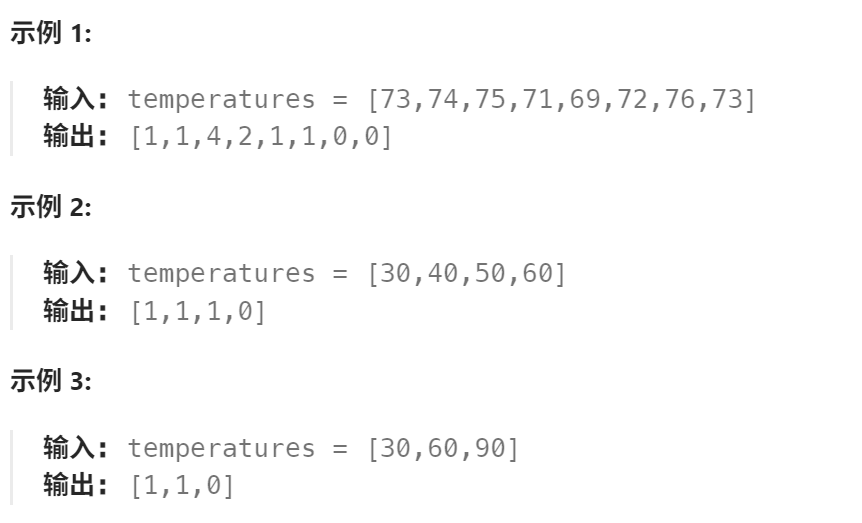

核心思路:

单调栈的核心目标是：

维护一个“还没找到更高温度的下标集合”

我们维护一个：

单调递减栈（栈里存下标）

栈的含义：

栈中存的是“未来还没有找到更高温度的日子”
并且对应温度是递减的

核心逻辑：

从左到右遍历：

如果当前温度 > 栈顶温度：
说明当前温度是栈顶那一天的“答案”
就可以弹栈并计算距离

直到栈顶温度 >= 当前温度为止

最后把当前下标入栈



In [5]:
from typing import List

class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        n = len(temperatures)
        
        # 结果数组
        ans = [0] * n
        
        # 单调递减栈（存下标）,栈顶对应的温度最低，栈里面的下标元素表示还未找到未来更高温度的那些天
        stack = []
        
        # 从左往右遍历
        for i in range(n):
            
            # 当前温度
            cur_temp = temperatures[i]
            

            # 将栈顶元素与当前元素比较，如果当前温度比栈顶对应温度高，说明找到了栈顶那天的答案
            # 直到栈顶元素对应的温度不再低于当前温度
            while stack and temperatures[stack[-1]] < cur_temp:
                
                # 将下标弹出栈顶
                prev_index = stack.pop()
                
                # 记录下答案，当前 i 是 prev_index 的最近更高温度,
                ans[prev_index] = i - prev_index
            
            # 当前下标入栈
            stack.append(i)
        
        return ans
temperatures = [73, 74, 75, 71, 69, 72, 76, 73]
print(Solution().dailyTemperatures(temperatures))  # 输出 [1, 1, 4, 2, 1, 1, 0, 0]

[1, 1, 4, 2, 1, 1, 0, 0]


时间复杂度：


1）入栈次数

每个元素只会入栈一次。

2）出栈次数

每个元素最多被弹出一次。

因为一旦弹出，就不会再次入栈。

3）while 循环总执行次数

虽然看起来嵌套在 for 里，

但所有元素的 pop 操作总次数 ≤ n。

因此：

总 push 次数 = n
总 pop 次数 ≤ n

所以总操作数：
≤ 2n

时间复杂度为：
O(n)

这是一种摊还分析（Amortized Analysis）。

空间复杂度：

1）结果数组：O(n)

2）栈：

最坏情况：温度单调递减
例如 [100, 99, 98, 97, …]

所有元素都会入栈，且不出栈。

因此栈最大大小：
n

空间复杂度：
O(n)

---

## 84. 柱状图中最大的矩形

给定 n 个非负整数，用来表示柱状图中各个柱子的高度。每个柱子彼此相邻，且宽度为 1 。

求在该柱状图中，能够勾勒出来的矩形的最大面积。

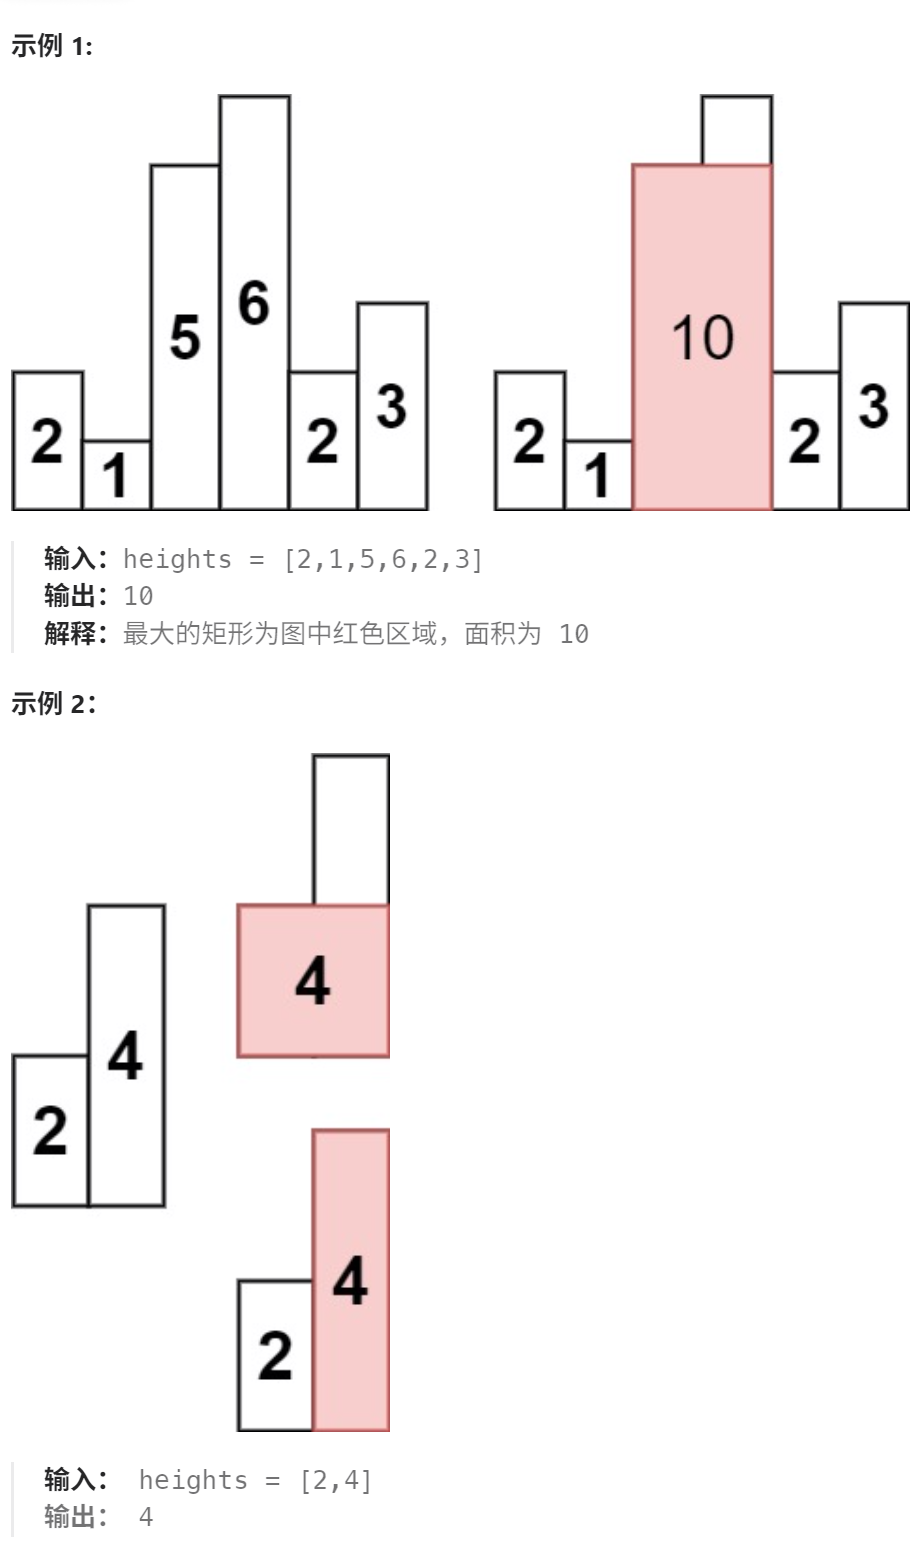

核心思路：
单调递增栈（栈中存下标）

含义：
栈中下标对应的高度是递增的。
当出现一个新的柱子高度比栈顶小：

说明：
栈顶柱子右边第一个更小元素找到了。
此时可以计算面积。

为了避免边界判断，我们：在数组头尾各加一个 0。

这样可以保证：
所有柱子都会被弹出并计算。


当一个柱子被弹出时：
当前 i 是它右边第一个更小

栈顶新的元素是它左边第一个更小

因此宽度自然确定。

每个柱子只会：

入栈一次
出栈一次

不会重复计算。

In [10]:
from typing import List

class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        
        # 在左右两侧补 0，方便统一处理边界
        heights = [0] + heights + [0]
        
        stack = []  # 单调递增栈（存下标）
        max_area = 0
        
        for i in range(len(heights)):
            
            # 如果当前高度小于栈顶高度
            # 说明栈顶柱子右边第一个更小元素找到了
            while stack and heights[stack[-1]] > heights[i]:
                
                # 弹出柱子
                height = heights[stack.pop()]
                
                # 此时：
                # i 是右边第一个更小元素
                # stack[-1] 是左边第一个更小元素
                width = i - stack[-1] - 1
                
                max_area = max(max_area, height * width)
            
            stack.append(i)
        
        return max_area
heights = [2,1,5,6,2,3]
print(Solution().largestRectangleArea(heights))  # 输出 10

10


heights = [0] + heights + [0]

一、时间复杂度

列表拼接会：

创建新列表

逐个复制所有元素

第一步：[0] + heights
复制 1 + n 个元素 → O(n)

第二步：结果 + [0]
再复制 n + 1 个元素 → O(n)

总时间复杂度：

O(n)

不会是 o(n)，而是 O(n)。
因为必须完整复制一遍数组，无法低于线性时间。

二、空间复杂度

拼接会创建一个新的列表，长度为：

n + 2

因此：

额外空间复杂度 O(n)

注意这里是“额外空间”。

虽然最终变量名仍叫 heights，但：

旧列表仍然存在（直到无引用被回收），
新列表占用新的连续内存。

因此从算法分析角度：

空间复杂度为 O(n)

---

时间复杂度分析

1）外层循环：n 次

2）每个元素：

最多入栈一次
最多出栈一次

总栈操作次数 ≤ 2n

因此：

时间复杂度 O(n)

这是摊还分析结果。


空间复杂度

栈最多存 n+2 个元素。

空间复杂度：

O(n)

---
